In [2]:
import requests
import yfinance as yf
import pandas as pd
from datetime import datetime

```
Step 1. 데이터 추출
     1-1. 뉴스 기사 수집
     1-2. 주가 데이터 수집
Step 2. 감성 분석
     2-1. 사전 학습 모델
     2-2. 감성 계량화
Step 3. 시각화 및 상관 분석
     3-1. 데이터 스케일링
     3-2. 상관 분석

```


## Step 1. 데이터 추출

### 1-1. 뉴스 기사

In [3]:
payload = {
    'search_text': 'nvidia',
    'tab': 'news',
    'offset': '0',
    'limit': '300'
}

header = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Language': 'ko-KR,ko;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Host': 'www.investing.com',
    'Origin': 'https://www.investing.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) \
        AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.5 Safari/605.1.15',
    'Connection': 'keep-alive',
    'Referer': 'https://www.investing.com/search/?q=nvidia&tab=news',
    'Content-Length': '41',
    'Cookie': '_ga=GA1.2.1762047025.1655369032; _gat=1; _gat_allSitesTracker=1; \
        _gid=GA1.2.997436499.1655896190; firstUdid=0; \
        smd=a7e3924b18be4162a2699d0daf7c7644-1655896188; \
        udid=a7e3924b18be4162a2699d0daf7c7644; \
        nyxDorf=Z2NiMG8xM3E3Y29iZTAyLj5uPmA2NmV5NzEzMA%3D%3D; \
        __gads=ID=c3f1b77968d77c6f:T=1655369032:RT=1655898739:S=ALNI_MaxT28X6Wp-axut6hMF_n4UbaVDQA;\
        __cf_bm=EVXRRKZvOitneR6pRhIlxq4ibJ74ijP4Uy1MaLm_K7M-1655898738-0-AYt081L4Mirt35SIOf4LRwZ2D/Dcwe2/wFECmJKu+hsmwUUAKm5+0dbHGc3uBhFJuQTOBQdWA6zJiY5Avy9wTVoYQKQj+doeNnkqVpc0uO9I3URmcreE8QgfcZN8HvN9BQzxRZyIoiYUZtnYgskfoZUagMInQZwDQgA6THweeH+x; _gaexp=GAX1.2.HHsGkqhgQ5WRQQdiTFpBgw.19224.0; invpc=5; G_ENABLED_IDPS=google; _fbp=fb.1.1655369032086.1894008139; pbjs-unifiedid=%7B%22TDID%22%3A%22603ffaaf-36ce-4268-a9a1-0046cde5295f%22%2C%22TDID_LOOKUP%22%3A%22FALSE%22%2C%22TDID_CREATED_AT%22%3A%222022-06-22T11%3A10%3A05%22%7D; pbjs-unifiedid_last=Wed%2C%2022%20Jun%202022%2011%3A10%3A05%20GMT; _pbjs_userid_consent_data=3524755945110770; csuuidSekindo=62aaf55b9e4b5; _hjSessionUser_174945=eyJpZCI6IjcwYjg2YzI3LTFkZWItNTJiNy04YzE5LTcyYmEwMmRlMTM5NCIsImNyZWF0ZWQiOjE2NTUzNzExNDg1NzAsImV4aXN0aW5nIjp0cnVlfQ==; adsFreeSalePopUp=3; gtmFired=OK; __gpi=UID=000006b0f601fe1b:T=1655369032:RT=1655896190:S=ALNI_MZ8_Ggw3XPaM-iLRX0OYnku1J2W1A; PHPSESSID=amdlh6jctelv49biek7meqrkfp; __cflb=02DiuGRugds2TUWHMkkNMgjqaR4Ws13aWvezascS6QMgQ; geoC=KR; _ga_H1WYEJQ780=GS1.1.1655371148.1.1.1655371256.60; SideBlockUser=a%3A1%3A%7Bs%3A6%3A%22stacks%22%3Ba%3A1%3A%7Bs%3A11%3A%22last_quotes%22%3Ba%3A2%3A%7Bi%3A0%3Ba%3A3%3A%7Bs%3A7%3A%22pair_ID%22%3Bi%3A13922%3Bs%3A10%3A%22pair_title%22%3Bs%3A7%3A%22KRW%2FUSD%22%3Bs%3A9%3A%22pair_link%22%3Bs%3A19%3A%22%2Fcurrencies%2Fkrw-usd%22%3B%7Di%3A1%3Ba%3A3%3A%7Bs%3A7%3A%22pair_ID%22%3Bi%3A1565%3Bs%3A10%3A%22pair_title%22%3Bs%3A7%3A%22CNY%2FJPY%22%3Bs%3A9%3A%22pair_link%22%3Bs%3A19%3A%22%2Fcurrencies%2Fcny-jpy%22%3B%7D%7D%7D%7D; r_p_s_n=1; pms={"f":2,"s":2}; \
        protectedMedia=2; adBlockerNewUserDomains=1654413444',
    'X-Requested-With': 'XMLHttpRequest',
    'Priority': 'u=3, i'
}

res = requests.post('https://www.investing.com/search/service/SearchInnerPage',
                    data=payload, headers=header)

In [4]:
df = pd.DataFrame(res.json()['news'])
df['dateTimestamp'] = df['dateTimestamp'].apply(lambda x : datetime.fromtimestamp(int(x)))
df = df.sort_values(by='dateTimestamp').reset_index(drop=True)
df

,name,content,smlID,date,dateTimestamp,dataID,link,providerID,providerName,searchable,image,priority
0,U.S. stocks trade higher on consumer sentiment...,Investing.com - U.S. shares traded higher Frid...,25,"May 11, 2012",2012-05-11 23:46:00,233580,/news/stock-market-news/u.s.-stocks-trade-high...,10,Investing.com,,https://i-invdn-com.akamaized.net/news/wallstr...,1000
1,U.S. seeks reversal of landmark insider tradin...,By Nate Raymond NEW YORK (Reuters) - Federal p...,25,"Jan 23, 2015",2015-01-24 11:05:45,324895,/news/stock-market-news/u.s.-to-seek-reversal-...,1,Reuters,"<span itemscope itemtype=""http: schema.org Co...",https://i-invdn-com.akamaized.net/news/externa...,0
2,Nvidia's fiscal fourth-quarter results beat es...,By Noel Randewich SAN FRANCISCO (Reuters) - IB...,288,"Feb 11, 2015",2015-02-12 08:01:16,327690,/news/technology-news/nvidia's-fiscal-fourth-q...,1,Reuters,"<span itemscope itemtype=""http: schema.org Co...",https://i-invdn-com.akamaized.net/news/externa...,0
3,"Dow falls for 7th straight day, as jobs report...",Investing.com -- U.S. stocks moved broadly low...,25,"Aug 07, 2015",2015-08-08 05:26:19,355050,/news/stock-market-news/dow-falls-for-7th-stra...,10,Investing.com,Dow Jones Industrial Average CVX XOM NASDAQ Co...,https://i-invdn-com.akamaized.net/news/wallstr...,1000
4,U.S. stocks mixed at close of trade; Dow Jones...,Investing.com – U.S. stocks were mixed after t...,25,"Nov 06, 2015",2015-11-07 06:25:41,370156,/news/stock-market-news/u.s.-stocks-mixed-at-c...,10,Investing.com,Financials Technology Basic Materials Utilitie...,https://i-invdn-com.akamaized.net/news/LYNXNPE...,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,"Oracle Earnings, Revenue Beat in Q4",Investing.com - Oracle (NYSE:ORCL) reported on...,25,"Jun 13, 2022",2022-06-14 05:09:54,2836586,/news/stock-market-news/oracle-earnings-revenu...,68,Investing.com,ORCL NVIDIA Broadcom NYSE,https://i-invdn-com.investing.com/news/oracle_...,0
296,Glass Lewis opposes lawyer election to SoftBan...,By Sam Nussey TOKYO (Reuters) - Proxy adviser...,25,"Jun 15, 2022",2022-06-15 13:06:15,2837162,/news/stock-market-news/glass-lewis-opposes-la...,1,Reuters,NVDA NASDAQ,https://i-invdn-com.investing.com/news/externa...,0
297,"Adobe Earnings, Revenue Beat in Q2",Investing.com - Adobe (NASDAQ:ADBE) reported o...,25,"Jun 16, 2022",2022-06-17 05:08:52,2838041,/news/stock-market-news/adobe-earnings-revenue...,68,Investing.com,ADBE NVIDIA Broadcom NASDAQ,https://i-invdn-com.investing.com/news/LYNXMPE...,0
298,Meta and other tech giants form metaverse stan...,"By Katie Paul (Reuters) - Meta, Microsoft (NA...",25,"Jun 21, 2022",2022-06-22 08:30:49,2839498,/news/stock-market-news/meta-and-other-tech-gi...,1,Reuters,MSFT AAPL META ADBE NVDA NASDAQ,https://i-invdn-com.investing.com/news/externa...,0


### 1-2. 주가

In [5]:
import yfinance as yf
nvda = yf.Ticker('NVDA')

In [115]:
ts_df = nvda.history(period='max')[['Close','Volume']]
ts_df

,Close,Volume
Date,,
1999-01-22,0.376630,271468800.0
1999-01-25,0.416086,51048000.0
1999-01-26,0.383804,34320000.0
1999-01-27,0.382609,24436800.0
1999-01-28,0.381413,22752000.0
...,...,...
2022-06-17,158.800003,62905700.0
2022-06-21,165.660004,48308900.0
2022-06-22,163.600006,43713500.0


## Step 2. 감성분석

### 2-1. 경제 뉴스 분석용 감성 모델

In [37]:
from transformers import pipeline
sentiment_pipe = pipeline(model='ProsusAI/finbert')
data_main = df['name'].tolist()
data_sub = df['content'].tolist()

res_main = sentiment_pipe(data_main)
res_sub = sentiment_pipe(data_sub)


Downloading: 100%|██████████| 1.18k/1.18k [00:00<00:00, 729kB/s]


In [38]:
senti_main = pd.DataFrame(res_main)
senti_sub = pd.DataFrame(res_sub)

In [39]:
senti_main

,label,score
0,positive,0.918040
1,negative,0.850765
2,positive,0.898395
3,negative,0.546366
4,negative,0.610221
...,...,...
295,positive,0.932791
296,neutral,0.707046
297,positive,0.918622
298,neutral,0.948425


In [40]:
senti_sub

,label,score
0,positive,0.931992
1,negative,0.893410
2,positive,0.956619
3,negative,0.967919
4,negative,0.901047
...,...,...
295,positive,0.910192
296,negative,0.638692
297,positive,0.880412
298,positive,0.774177


In [58]:
senti_df = pd.DataFrame(data={
    'date': df['dateTimestamp'],
    'title': df['name'],
    'title_senti': senti_main['label'],
    'title_sentiscore': senti_main['score'],
    'content': df['content'],
    'content_senti': senti_sub['label'],
    'content_sentiscore': senti_sub['score']
})
senti_df

,date,title,title_senti,title_sentiscore,content,content_senti,content_sentiscore
0,2012-05-11 23:46:00,U.S. stocks trade higher on consumer sentiment...,positive,0.918040,Investing.com - U.S. shares traded higher Frid...,positive,0.931992
1,2015-01-24 11:05:45,U.S. seeks reversal of landmark insider tradin...,negative,0.850765,By Nate Raymond NEW YORK (Reuters) - Federal p...,negative,0.893410
2,2015-02-12 08:01:16,Nvidia's fiscal fourth-quarter results beat es...,positive,0.898395,By Noel Randewich SAN FRANCISCO (Reuters) - IB...,positive,0.956619
3,2015-08-08 05:26:19,"Dow falls for 7th straight day, as jobs report...",negative,0.546366,Investing.com -- U.S. stocks moved broadly low...,negative,0.967919
4,2015-11-07 06:25:41,U.S. stocks mixed at close of trade; Dow Jones...,negative,0.610221,Investing.com – U.S. stocks were mixed after t...,negative,0.901047
...,...,...,...,...,...,...,...
295,2022-06-14 05:09:54,"Oracle Earnings, Revenue Beat in Q4",positive,0.932791,Investing.com - Oracle (NYSE:ORCL) reported on...,positive,0.910192
296,2022-06-15 13:06:15,Glass Lewis opposes lawyer election to SoftBan...,neutral,0.707046,By Sam Nussey TOKYO (Reuters) - Proxy adviser...,negative,0.638692
297,2022-06-17 05:08:52,"Adobe Earnings, Revenue Beat in Q2",positive,0.918622,Investing.com - Adobe (NASDAQ:ADBE) reported o...,positive,0.880412
298,2022-06-22 08:30:49,Meta and other tech giants form metaverse stan...,neutral,0.948425,"By Katie Paul (Reuters) - Meta, Microsoft (NA...",positive,0.774177


In [59]:
import warnings 
warnings.filterwarnings(action='ignore')

senti_df = senti_df.set_index('date')
senti_df

,title,title_senti,title_sentiscore,content,content_senti,content_sentiscore
date,,,,,,
2012-05-11 23:46:00,U.S. stocks trade higher on consumer sentiment...,positive,0.918040,Investing.com - U.S. shares traded higher Frid...,positive,0.931992
2015-01-24 11:05:45,U.S. seeks reversal of landmark insider tradin...,negative,0.850765,By Nate Raymond NEW YORK (Reuters) - Federal p...,negative,0.893410
2015-02-12 08:01:16,Nvidia's fiscal fourth-quarter results beat es...,positive,0.898395,By Noel Randewich SAN FRANCISCO (Reuters) - IB...,positive,0.956619
2015-08-08 05:26:19,"Dow falls for 7th straight day, as jobs report...",negative,0.546366,Investing.com -- U.S. stocks moved broadly low...,negative,0.967919
2015-11-07 06:25:41,U.S. stocks mixed at close of trade; Dow Jones...,negative,0.610221,Investing.com – U.S. stocks were mixed after t...,negative,0.901047
...,...,...,...,...,...,...
2022-06-14 05:09:54,"Oracle Earnings, Revenue Beat in Q4",positive,0.932791,Investing.com - Oracle (NYSE:ORCL) reported on...,positive,0.910192
2022-06-15 13:06:15,Glass Lewis opposes lawyer election to SoftBan...,neutral,0.707046,By Sam Nussey TOKYO (Reuters) - Proxy adviser...,negative,0.638692
2022-06-17 05:08:52,"Adobe Earnings, Revenue Beat in Q2",positive,0.918622,Investing.com - Adobe (NASDAQ:ADBE) reported o...,positive,0.880412


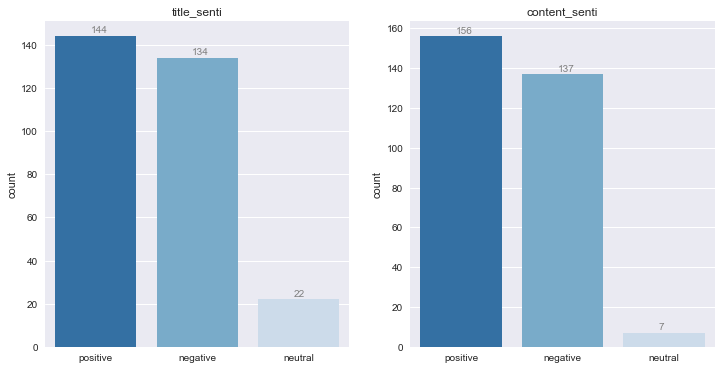

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

plt.figure(figsize=(12,6))

plt.subplot(121)
ax = sns.countplot(senti_df['title_senti'], palette='Blues_r')
plt.xlabel('')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+1.5), c='gray')
plt.title('title_senti')

plt.subplot(122)
ax = sns.countplot(senti_df['content_senti'], palette='Blues_r')
plt.title('content_senti')
plt.xlabel('')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+1.5), c='gray')
plt.show()


### 2-2. 계량화

In [103]:
def cat_to_num(x):
    if x == 'positive':
        return 3
    elif x == 'neutral':
        return 2
    elif x == 'negative':
        return 1
    else:
        return -1 # check else

senti_df['title_senti'] = senti_df['title_senti'].apply(lambda x : cat_to_num(x))
senti_df['content_senti'] = senti_df['content_senti'].apply(lambda x : cat_to_num(x))

print(senti_df['title_senti'].value_counts())
print(senti_df['content_senti'].value_counts())

3    144
1    134
2     22
Name: title_senti, dtype: int64
3    156
1    137
2      7
Name: content_senti, dtype: int64


In [104]:
senti_df

,title,title_senti,title_sentiscore,content,content_senti,content_sentiscore
date,,,,,,
2012-05-11 23:46:00,U.S. stocks trade higher on consumer sentiment...,3,0.918040,Investing.com - U.S. shares traded higher Frid...,3,0.931992
2015-01-24 11:05:45,U.S. seeks reversal of landmark insider tradin...,1,0.850765,By Nate Raymond NEW YORK (Reuters) - Federal p...,1,0.893410
2015-02-12 08:01:16,Nvidia's fiscal fourth-quarter results beat es...,3,0.898395,By Noel Randewich SAN FRANCISCO (Reuters) - IB...,3,0.956619
2015-08-08 05:26:19,"Dow falls for 7th straight day, as jobs report...",1,0.546366,Investing.com -- U.S. stocks moved broadly low...,1,0.967919
2015-11-07 06:25:41,U.S. stocks mixed at close of trade; Dow Jones...,1,0.610221,Investing.com – U.S. stocks were mixed after t...,1,0.901047
...,...,...,...,...,...,...
2022-06-14 05:09:54,"Oracle Earnings, Revenue Beat in Q4",3,0.932791,Investing.com - Oracle (NYSE:ORCL) reported on...,3,0.910192
2022-06-15 13:06:15,Glass Lewis opposes lawyer election to SoftBan...,2,0.707046,By Sam Nussey TOKYO (Reuters) - Proxy adviser...,1,0.638692
2022-06-17 05:08:52,"Adobe Earnings, Revenue Beat in Q2",3,0.918622,Investing.com - Adobe (NASDAQ:ADBE) reported o...,3,0.880412


In [105]:
senti_df['score'] = (senti_df['title_senti'] * senti_df['title_sentiscore']) + (senti_df['content_senti'] * senti_df['content_sentiscore'])
senti_df['score'] /= 2
senti_df

,title,title_senti,title_sentiscore,content,content_senti,content_sentiscore,score
date,,,,,,,
2012-05-11 23:46:00,U.S. stocks trade higher on consumer sentiment...,3,0.918040,Investing.com - U.S. shares traded higher Frid...,3,0.931992,2.775048
2015-01-24 11:05:45,U.S. seeks reversal of landmark insider tradin...,1,0.850765,By Nate Raymond NEW YORK (Reuters) - Federal p...,1,0.893410,0.872087
2015-02-12 08:01:16,Nvidia's fiscal fourth-quarter results beat es...,3,0.898395,By Noel Randewich SAN FRANCISCO (Reuters) - IB...,3,0.956619,2.782520
2015-08-08 05:26:19,"Dow falls for 7th straight day, as jobs report...",1,0.546366,Investing.com -- U.S. stocks moved broadly low...,1,0.967919,0.757143
2015-11-07 06:25:41,U.S. stocks mixed at close of trade; Dow Jones...,1,0.610221,Investing.com – U.S. stocks were mixed after t...,1,0.901047,0.755634
...,...,...,...,...,...,...,...
2022-06-14 05:09:54,"Oracle Earnings, Revenue Beat in Q4",3,0.932791,Investing.com - Oracle (NYSE:ORCL) reported on...,3,0.910192,2.764475
2022-06-15 13:06:15,Glass Lewis opposes lawyer election to SoftBan...,2,0.707046,By Sam Nussey TOKYO (Reuters) - Proxy adviser...,1,0.638692,1.026392
2022-06-17 05:08:52,"Adobe Earnings, Revenue Beat in Q2",3,0.918622,Investing.com - Adobe (NASDAQ:ADBE) reported o...,3,0.880412,2.698552


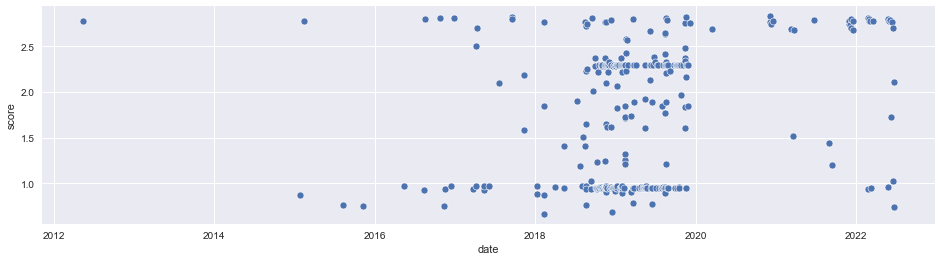

In [167]:
import numpy as np

plt.figure(figsize=(16,4))
sns.scatterplot(x=senti_df.index, y=senti_df['score'])
plt.show()

## Step 3. 시각화 및 상관분석

### 3-1. 데이터 스케일링

In [390]:
target_ts_df = ts_df[senti_df.index[0].strftime('%Y-%m') : senti_df.index[-1].strftime('%Y-%m')]
target_ts_df

,Close,Volume
Date,,
2012-05-01,3.037144,40868000.0
2012-05-02,2.949910,68400800.0
2012-05-03,2.899405,41953600.0
2012-05-04,2.814466,54509200.0
2012-05-07,2.862675,60444000.0
...,...,...
2022-06-17,158.800003,62905700.0
2022-06-21,165.660004,48308900.0
2022-06-22,163.600006,43713500.0


In [398]:
def show_target_moving(df, unit):
    data = df.resample(unit)['Close'].mean()

    plt.figure(figsize=(16,6))
    plt.subplot(311)
    sns.lineplot(x=data.index, y=data)
    plt.ylabel('base')
    plt.subplot(312)
    sns.lineplot(x=data.index, y=np.log(data))
    plt.ylabel('log_base')
    plt.subplot(313)
    sns.lineplot(x=data.index, y=np.log(data).diff())
    plt.ylabel('diff_log_base')
    
    plt.suptitle(f'unit : {unit}')
    plt.tight_layout()
    plt.show()

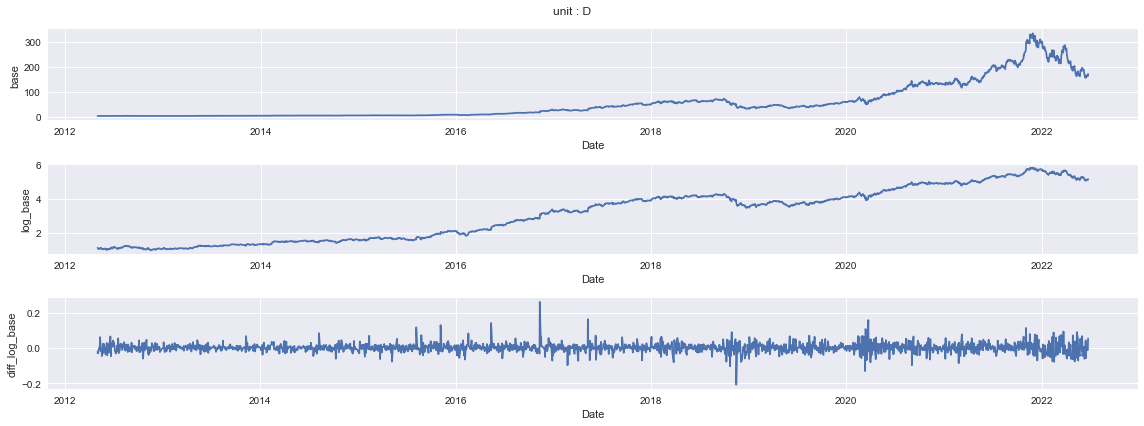

In [397]:
show_target_moving(target_ts_df, 'D')

### 3-2. 상관분석

In [472]:
def show_target_bins(target_df, score_df, unit, ax, i):
    data = target_df.resample(unit)['Close'].mean()

    scaled_target = np.log(data).diff()
    scaled_target = (scaled_target - scaled_target.min()) / (scaled_target.max() - scaled_target.min()) - 0.5
    
    scaled_score = (score_df['score'] - score_df['score'].min()) / (score_df['score'].max() - score_df['score'].min()) - 0.5

    pos_target = scaled_target.copy()
    pos_target[pos_target < 0] = np.nan
    neg_target = scaled_target.copy()
    neg_target[neg_target >= 0] = np.nan

    pos_score = scaled_score.copy()
    pos_score[pos_score < 0] = np.nan
    neg_score = scaled_score.copy()
    neg_score[neg_score >= 0] = np.nan

    plt.bar(x=pos_target.index, height=pos_target, color='r', width=20, alpha=0.5, axes=ax[i])
    plt.bar(x=neg_target.index, height=neg_target, color='b', width=20, alpha=0.5, axes=ax[i])

    plt.scatter(x=pos_score.index, y=pos_score, label='positive', c='r', alpha=0.3, s=20, axes=ax[i])
    plt.scatter(x=neg_score.index, y=neg_score, label='negative', c='b', alpha=0.3, s=20, axes=ax[i])

    plt.legend()
    plt.title(f'unit : {unit}')

In [495]:
from scipy import stats

def show_target_corr(target_df, score_df, unit, ax, i):
    data = target_df.resample(unit)['Close'].mean()

    scaled_target = np.log(data).diff()
    scaled_target = (scaled_target - scaled_target.min()) / (scaled_target.max() - scaled_target.min()) - 0.5
    resampled_target = scaled_target.resample(unit).mean()
    resampled_target.index = resampled_target.index.strftime('%Y-%m-%d')
    
    scaled_score = (score_df['score'] - score_df['score'].min()) / (score_df['score'].max() - score_df['score'].min()) - 0.5
    resampled_score = scaled_score.resample(unit).mean()
    resampled_score.index = resampled_score.index.strftime('%Y-%m-%d')
    
    resampled_df = pd.merge(left=resampled_score, right=resampled_target, left_index=True, right_index=True, how='inner').dropna()
    sns.heatmap(resampled_df.corr(), linecolor='w', linewidth=1, annot=True, fmt='.2f', cmap='YlGnBu', axes=ax[i])
    s = stats.pearsonr(resampled_df['score'], resampled_df['Close'])
    plt.title(f'unit:{unit} - r:{s[0]:.2f} p:{s[1]:.2f}')
    plt.tight_layout()

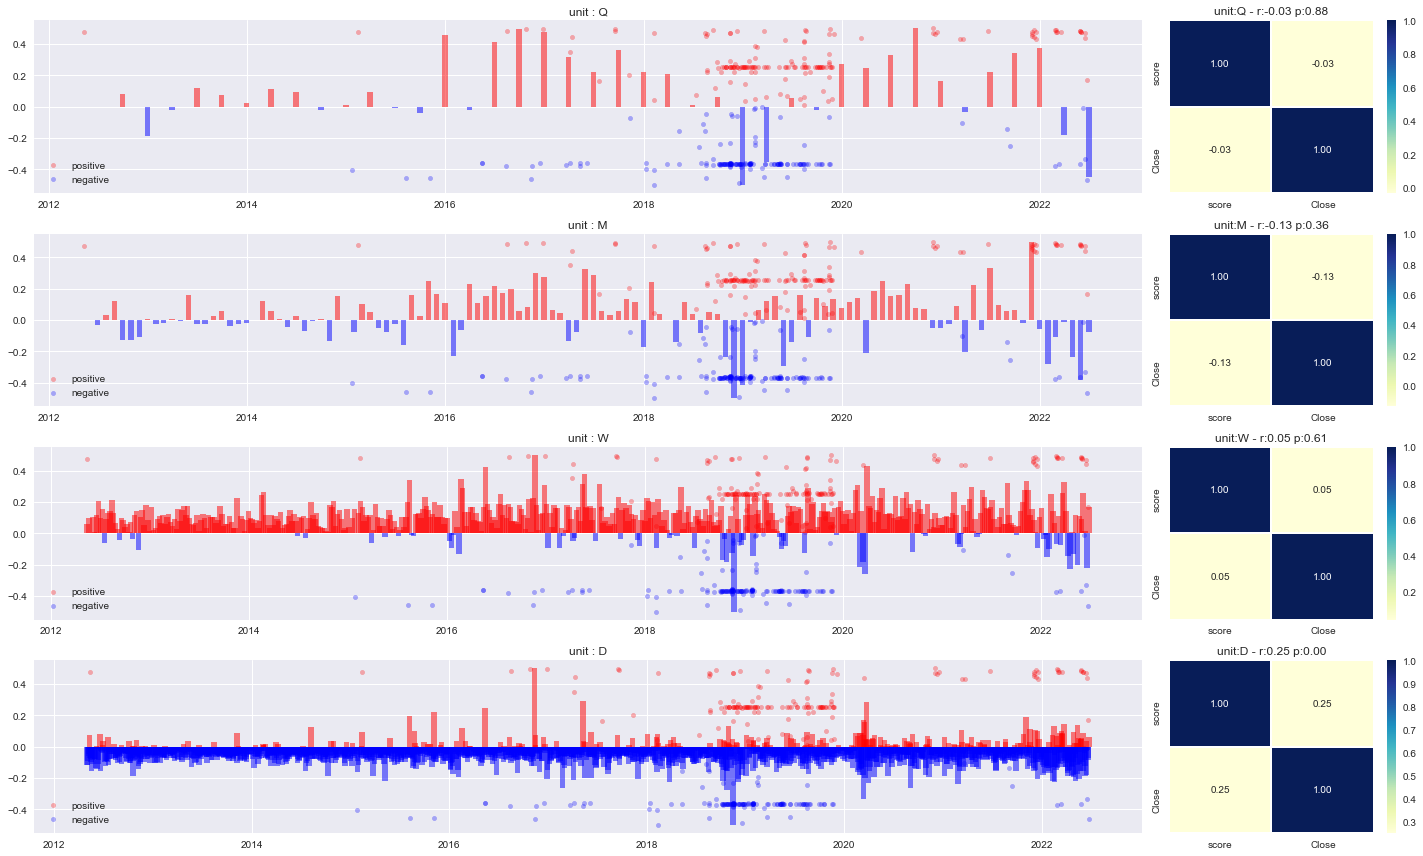

In [496]:
fig = plt.figure(figsize=(20,12))

gs = fig.add_gridspec(4, 5)

ax = [None for _ in range(8)]
ax[0] = fig.add_subplot(gs[0, :-1])
show_target_bins(target_ts_df, senti_df, 'Q', ax, 0)
ax[1] = fig.add_subplot(gs[1, :-1])
show_target_bins(target_ts_df, senti_df, 'M', ax, 1)
ax[2] = fig.add_subplot(gs[2, :-1])
show_target_bins(target_ts_df, senti_df, 'W', ax, 2)
ax[3] = fig.add_subplot(gs[3, :-1])
show_target_bins(target_ts_df, senti_df, 'D', ax, 3)

ax[4] = fig.add_subplot(gs[0, -1])
show_target_corr(target_ts_df, senti_df, 'Q', ax, 4)
ax[5] = fig.add_subplot(gs[1, -1])
show_target_corr(target_ts_df, senti_df, 'M', ax, 5)
ax[6] = fig.add_subplot(gs[2, -1])
show_target_corr(target_ts_df, senti_df, 'W', ax, 6)
ax[7] = fig.add_subplot(gs[3, -1])
show_target_corr(target_ts_df, senti_df, 'D', ax, 7)

plt.show()

